In [1]:
import pandas as pd

In [2]:
a1 = pd.read_excel("2024-district-level-state-va.xlsx")

In [3]:
#a1['District Name'] = a1['District Name'].str.replace("School District",'SD')

In [4]:
b1 = pd.read_csv("economically disatvantaged students Bucks - Sheet1.csv")

In [5]:
b1[~b1["School District"].isin(a1['District Name'])]

,School District,PercentofEnrollemntED
1,Bristol Boro School District,75.6
6,Morrisville Boro School District,91.6


In [6]:
b1['School District'] = b1['School District'].str.replace("Boro", "Borough")

In [7]:
a1[a1['District Name'].isin(b1['School District'])]['District Name'].value_counts()

Bensalem Township School District       17
Bristol Borough School District         17
Bristol Township School District        17
Centennial School District              17
Central Bucks School District           17
Council Rock School District            17
Morrisville Borough School District     17
Neshaminy School District               17
New Hope-Solebury School District       17
Palisades School District               17
Pennridge School District               17
Pennsbury School District               17
Quakertown Community School District    17
Name: District Name, dtype: int64

In [8]:
b1

,School District,PercentofEnrollemntED
0,Bensalem Township School District,58.4
1,Bristol Borough School District,75.6
2,Bristol Township School District,64.7
3,Centennial School District,50.7
4,Central Bucks School District,13.4
5,Council Rock School District,15.4
6,Morrisville Borough School District,91.6
7,Neshaminy School District,38.0
8,New Hope-Solebury School District,14.2
9,Palisades School District,31.1


In [9]:
c1 = pd.read_excel("2024-pssa-district-data.xlsx", skiprows=4)

In [10]:
c1 = c1[c1.County=="BUCKS"]

In [11]:
c1.Subject.value_counts()

English Language Arts    1055
Math                     1055
Science                   457
Name: Subject, dtype: int64

In [12]:
c1.Group.value_counts()

All Students                                     221
Male                                             221
Female                                           221
White (not Hispanic)                             221
Hispanic (any race)                              221
IEP                                              221
Economically Disadvantaged                       221
Multi-ethnic (not Hispanic)                      219
ELL                                              209
Black or African American (not Hispanic)         208
Asian (not Hispanic)                             203
American Indian/Alaskan Native (not Hispanic)    113
Native Hawaiian or other Pacific Islander         68
Name: Group, dtype: int64

In [13]:
c2 = c1[(c1['Group'].str.contains("All Students|Econom"))&(c1.Grade=='Total')]

In [14]:
b1.rename(columns={'School District':'District Name'},inplace=True)

In [15]:
b1

,District Name,PercentofEnrollemntED
0,Bensalem Township School District,58.4
1,Bristol Borough School District,75.6
2,Bristol Township School District,64.7
3,Centennial School District,50.7
4,Central Bucks School District,13.4
5,Council Rock School District,15.4
6,Morrisville Borough School District,91.6
7,Neshaminy School District,38.0
8,New Hope-Solebury School District,14.2
9,Palisades School District,31.1


In [16]:
c2['District Name'] = c2['District Name'].str.title().str.replace("Sd",'School District')

C:\Users\c_ull\AppData\Local\Temp\ipykernel_1212\3277968672.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c2['District Name'] = c2['District Name'].str.title().str.replace("Sd",'School District')


In [17]:
keys = b1['District Name']
values = b1.PercentofEnrollemntED
dict1 = dict(zip(keys,values))

In [18]:
c2['pct_ED']=c2['District Name'].map(dict1)

C:\Users\c_ull\AppData\Local\Temp\ipykernel_1212\654926273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  c2['pct_ED']=c2['District Name'].map(dict1)


In [19]:
c3 = c2[c2.Group=='All Students']

In [20]:
c3.columns

Index(['Year', 'AUN', 'County', 'District Name', 'Subject', 'Group', 'Grade',
       'Number Scored', 'Percent Advanced', 'Percent Proficient',
       'Percent Basic', 'Percent Below Basic', 'Percent Proficient and above',
       'pct_ED'],
      dtype='object')

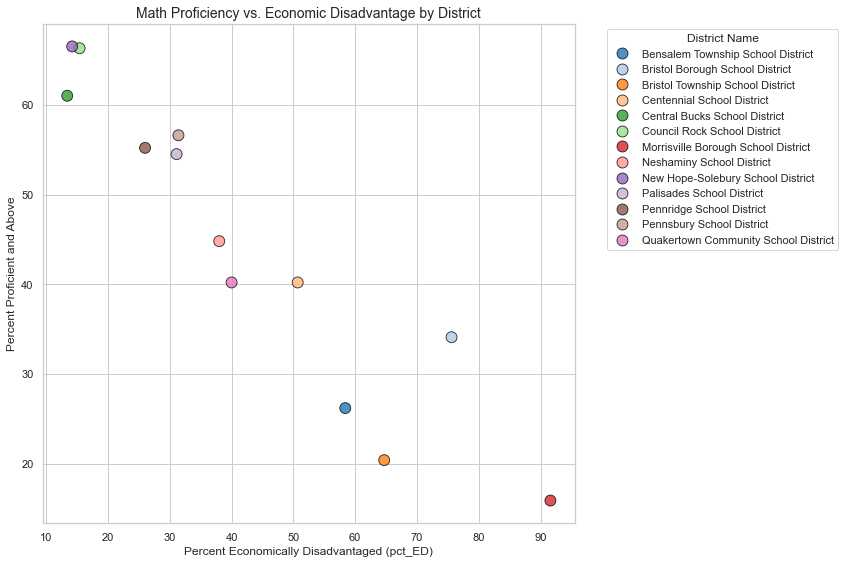

Scatter plot saved to Scatter_plots\Math_Proficiency_vs_pctED.png


In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
import os

# Filter the data for the chosen subject, e.g., 'Math'
subject_filter = 'Math'  # Change to 'English Language Arts' or 'Science' as needed
filtered_c3 = c3[c3['Subject'] == subject_filter]

# Create the folder "Scatter_plots" if it doesn't exist
output_dir = 'Scatter_plots'
os.makedirs(output_dir, exist_ok=True)

# Set the plot style
sns.set(style="whitegrid")

# Define a larger color palette for 13 districts
palette = sns.color_palette('tab20', n_colors=13)

# Initialize the plot
plt.figure(figsize=(12, 8))

# Scatter plot with hue based on 'District Name' using the expanded color palette
sns.scatterplot(
    data=filtered_c3,
    x='pct_ED',
    y='Percent Proficient and above',
    hue='District Name',
    palette=palette,
    s=120,
    alpha=0.8,
    edgecolor='black'
)

# Plot labels and title
plt.xlabel('Percent Economically Disadvantaged (pct_ED)', fontsize=12)
plt.ylabel('Percent Proficient and Above', fontsize=12)
plt.title(f'{subject_filter} Proficiency vs. Economic Disadvantage by District', fontsize=14)
plt.legend(title='District Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Define the file path
file_path = os.path.join(output_dir, f'{subject_filter}_Proficiency_vs_pctED.png')

# Save the plot as a PNG image
plt.savefig(file_path, dpi=300, bbox_inches='tight')

# Show the plot
plt.show()

print(f"Scatter plot saved to {file_path}")

['English Language Arts', 'Math', 'Science']